# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')


### Understanding the structure of the data

In [ ]:
# Read the data
#df = pd.read_csv("drive/MyDrive/MIT_course/Week_2/foodhub_order.csv")
df = pd.read_csv("foodhub_order.csv")
# Returns the first 5 rows
df.head(10)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5,21,26
9,1477311,39705,Bukhara Grill,Indian,7.18,Weekday,5,29,26


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
df.shape# Find shape

(1898, 9)

Data has 1898 rows, each representing an order, and 9 columns, each representing an attribute of that order.  

#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
df.info()## Use info() to print a concise summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: Dataframe is reading the 1st 2 columns as integers (even though they're numeric IDs), columns 2 and 3 as categorical, column 4 as float, columns 5 and 6 as categorical, and then columns 7 and 8 as integers.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

#### Observations:  Judging by the "Not given"s in the head above, I'm expecting at least a few missing vaues in the rating.  However, since each column shows 1898, the dataframe is treating the "Not given"s as non-null values.  Therefore, there are no missing values in the data.  


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
df.describe()# Write your code here

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations: food_preparation_time a min of 20 minutes, a mean of 27.4±4.6 minutes, and a max of 35 miuntes.

### **Question 5:** How many orders are not rated? [1 mark]

(736, 9)


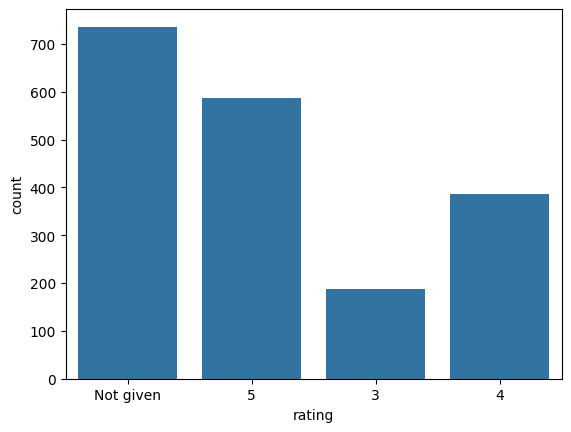

In [ ]:
df_no_rating=df[df['rating']==('Not given')]#make a dataframe out of only the rows with ratings that are 'Not Given'
print(df_no_rating.shape)# looking at the number of rows and columns of the Not Given table
sns.countplot(data=df, x='rating');#Get a visual comparision of how many are not rated compared to rated at different scores.

#### Observations: The dataframe consisting of ony rows with Not given ratings has 736 entries out of 1898 total orders.  Therefore this [rating] column is sparse enough that we're going to discount it.  The non-response bias could easily be large enough to overwhelm any conclusions we might draw.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Exploring all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

The first 3 columns are just ID numbers or a string representing restaurant names, so no univariate analysis to do.  Might be interesting to see if there are any repeat restaurant names.

In [ ]:
df.nunique()# Number of unique values for each column.

order_id                 1898
customer_id              1200
restaurant_name           178
cuisine_type               14
cost_of_the_order         312
day_of_the_week             2
rating                      4
food_preparation_time      16
delivery_time              19
dtype: int64

So, we've got 1200 customers placing 1898 orders at 178 restaurants.  Cuisine type could be interesting.

<Axes: xlabel='cuisine_type', ylabel='Count'>

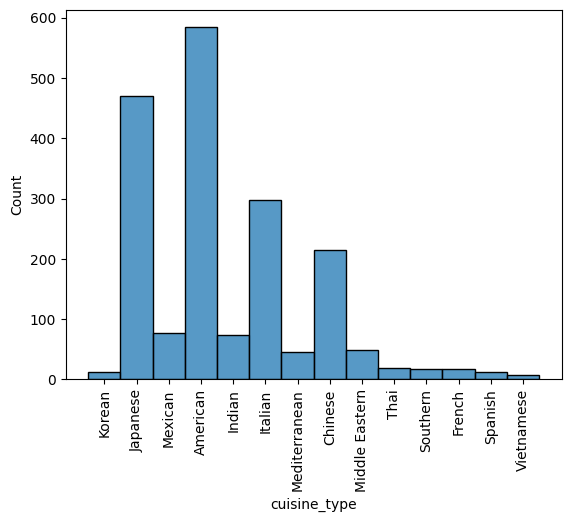

In [ ]:
plt.xticks(rotation=90)
sns.histplot(x=df['cuisine_type'], kde=False)

Most popular restaurant types ordered through the app are American, Japanese, Italians, and Chinese.  Would be interesting to compare this the prevalence of each of these restaurant types in the neighbhorhood to see if people are more likely to use the app for a given restaurant type, but we do not have that data.  

<Axes: xlabel='cost_of_the_order'>

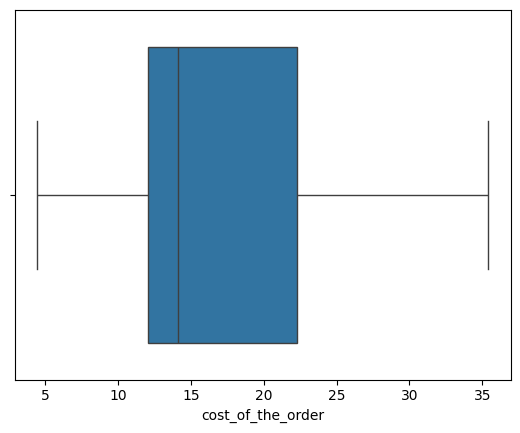

In [ ]:
sns.boxplot(x=df['cost_of_the_order'])

<Axes: xlabel='Order cost ($)', ylabel='Count'>

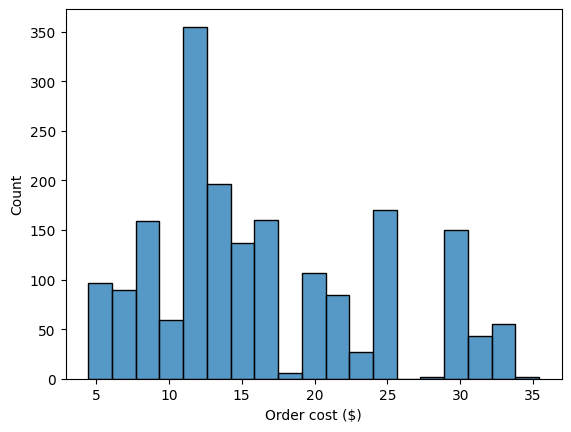

In [ ]:
plt.xlabel('Order cost ($)')
sns.histplot(x=df['cost_of_the_order'], kde=False)

Histgram confirms that distribution of order cost skews right with the median far to the left of the center of the Inter-Quartile Range (IQR) box.

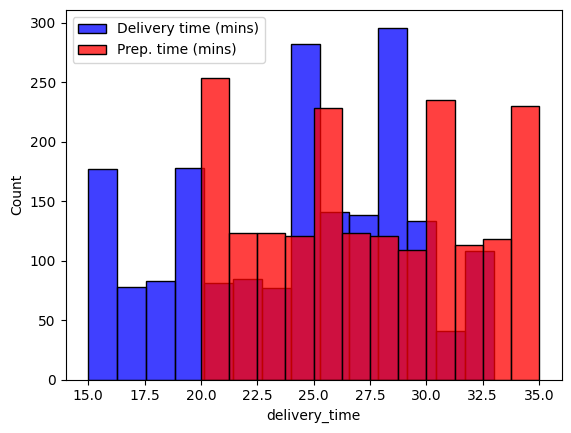

In [ ]:
sns.histplot(x=df['delivery_time'], kde=False, color='blue', label='Delivery time (mins)')
sns.histplot(x=df['food_preparation_time'], kde=False, color='red', label="Prep. time (mins)")
plt.legend()


array([[<Axes: title={'center': 'order_id'}>,
        <Axes: title={'center': 'customer_id'}>],
       [<Axes: title={'center': 'cost_of_the_order'}>,
        <Axes: title={'center': 'food_preparation_time'}>],
       [<Axes: title={'center': 'delivery_time'}>, <Axes: >]],
      dtype=object)

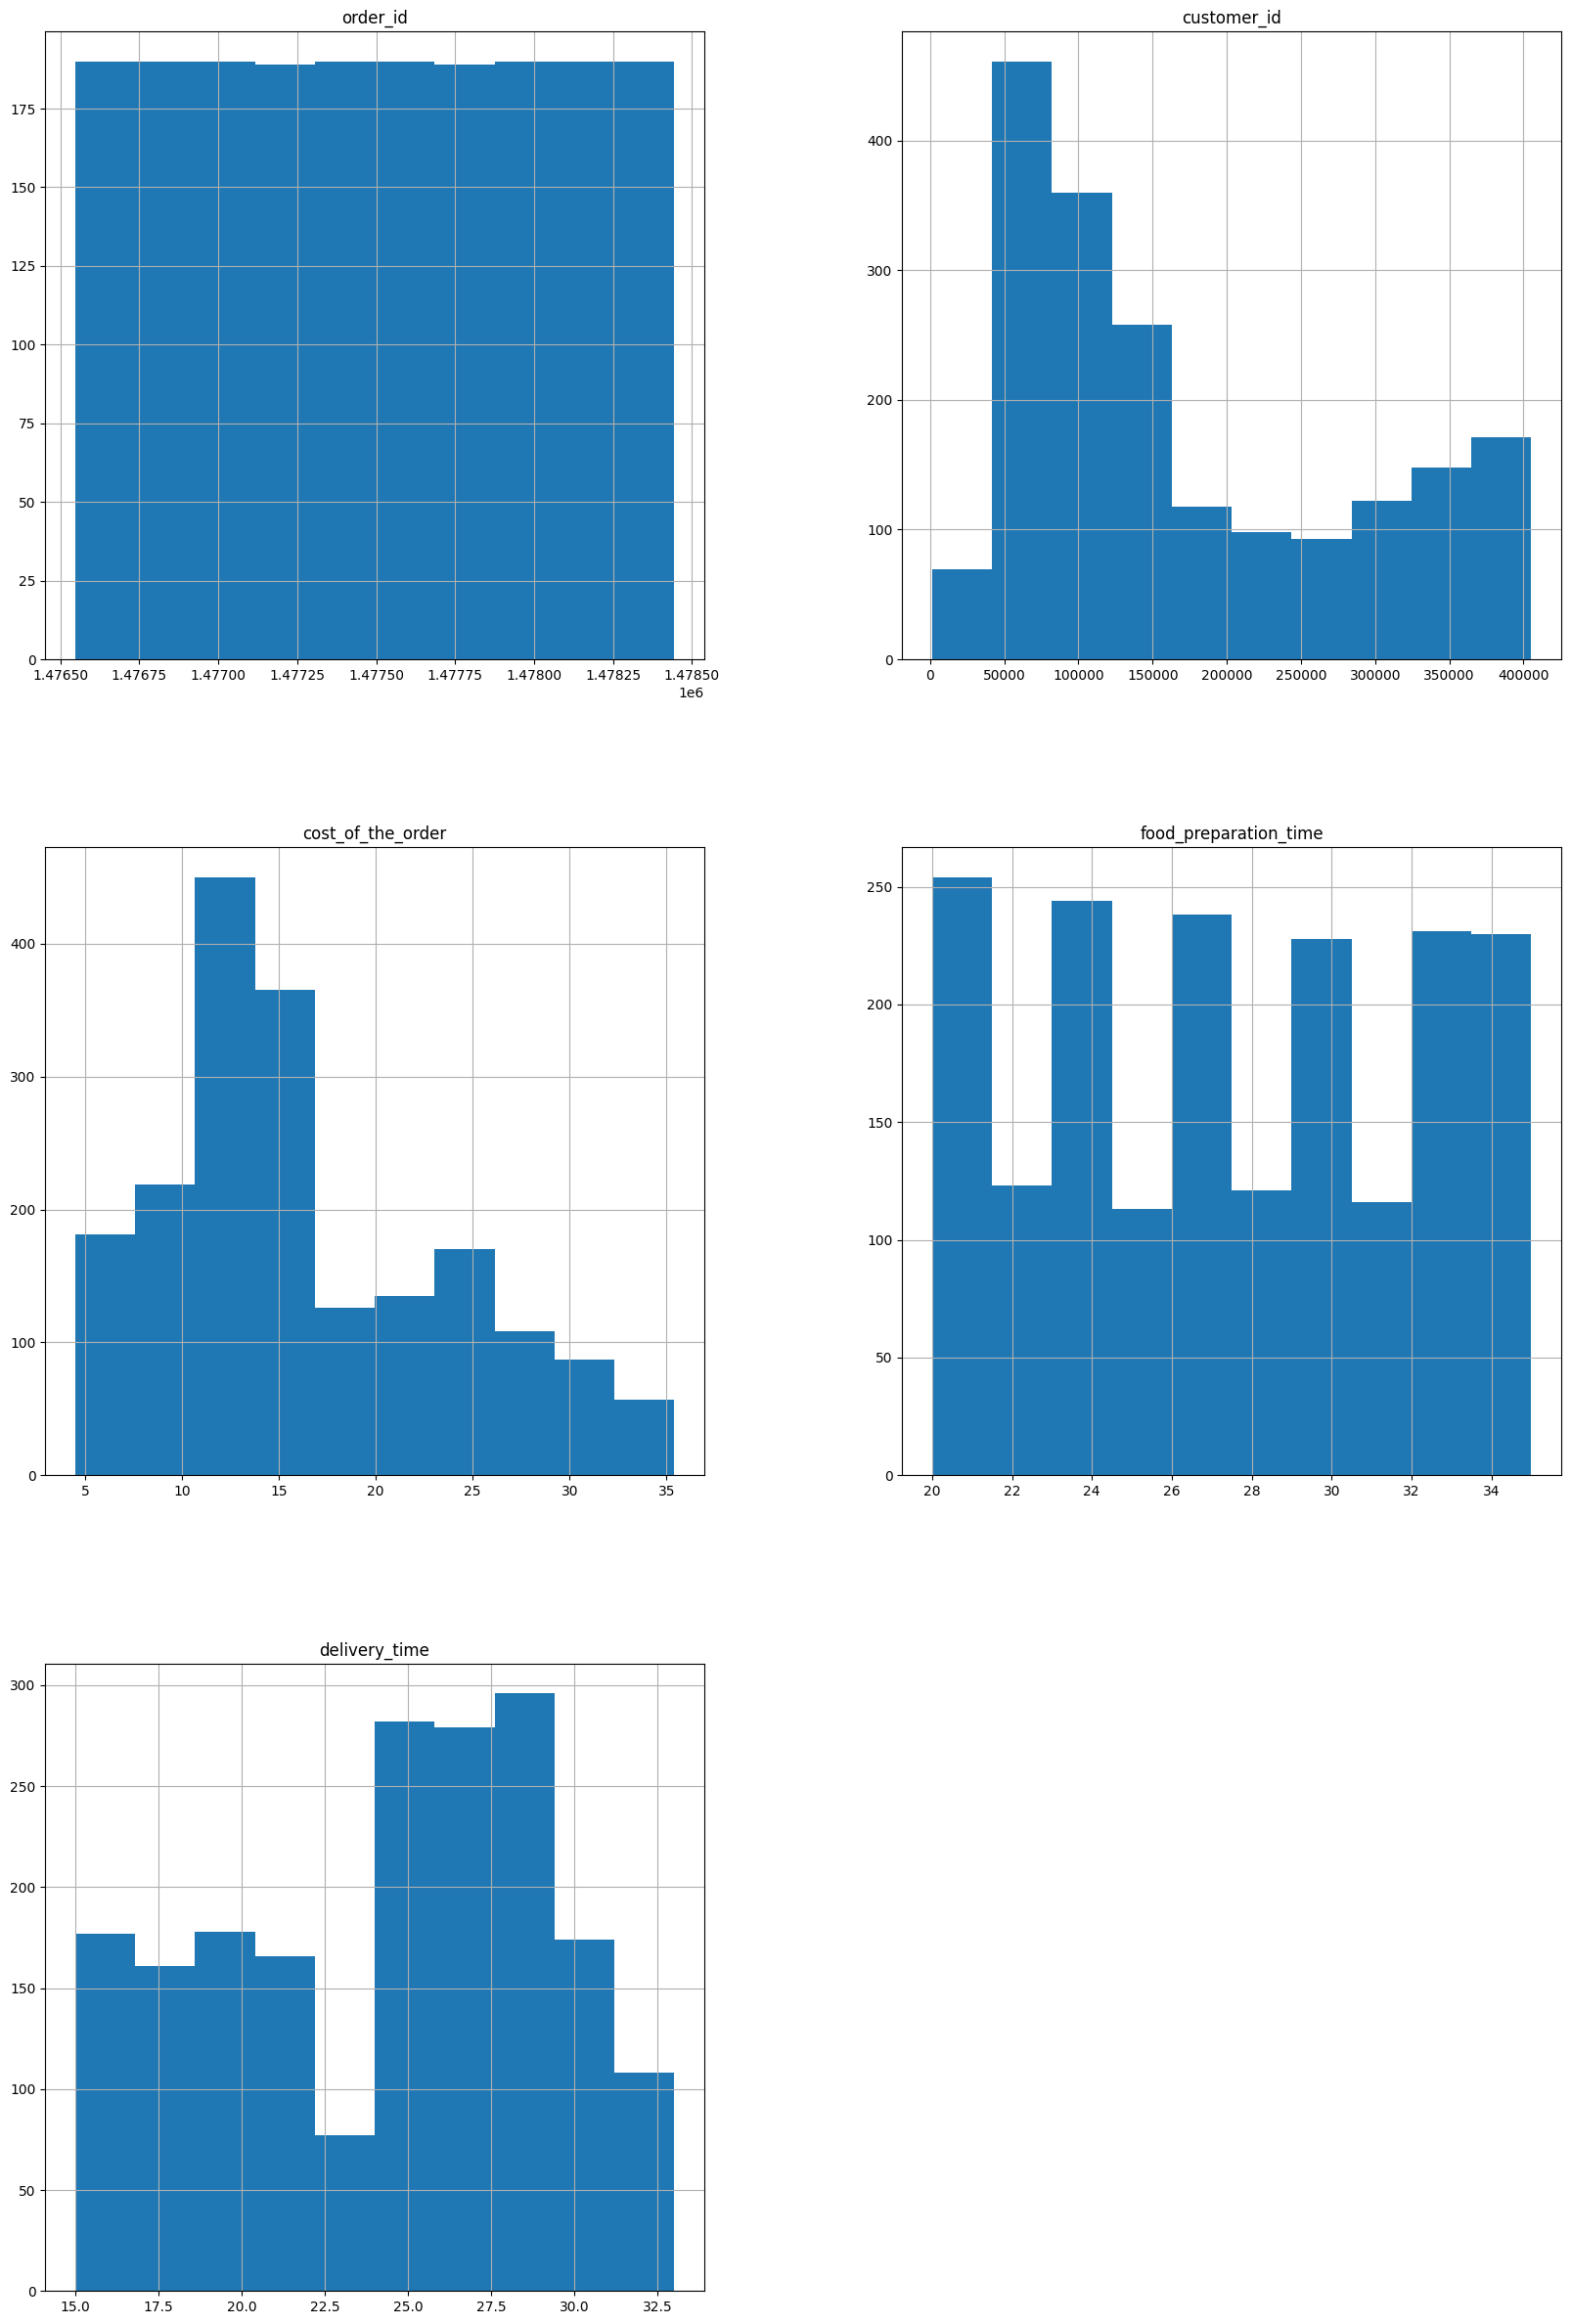

In [ ]:
df.hist(figsize=(20,30))

Doing a comprehensive histogram list, we also find that some customers are repeat customers, but that order IDs are indeed unique, as suspected.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

<Axes: xlabel='restaurant_name', ylabel='Count'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 140 (\x8c) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 142 (\x8e) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


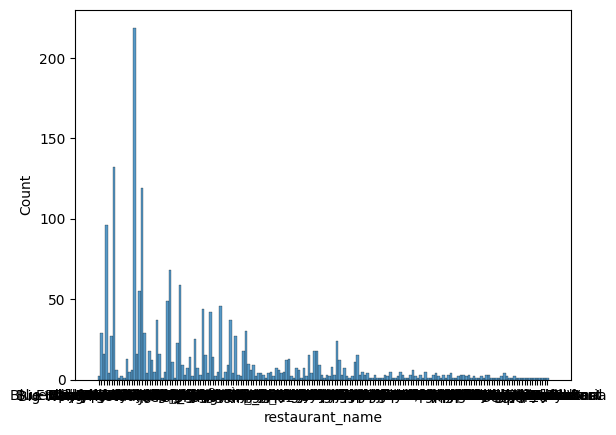

In [ ]:
sns.histplot(x=df['restaurant_name'], kde=False)#This will obviously be too crowded to read but let's see.

In [ ]:
df['restaurant_name'].value_counts()# Better just get a count.

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

#### **Observations:** Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm have the highest order counts respectively in decreasing order.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

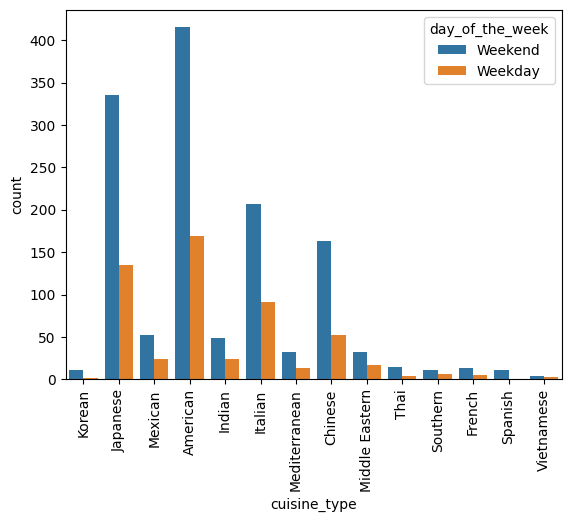

In [ ]:
plt.xticks(rotation=90)
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week') ;

#### **Observations**:The most popular cuisine on weekends is American, though this is pretty similiar to the weekday pattern.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
requirement=df['cost_of_the_order']>20#creates an array of booleans corresponding to whether each order is over $20.
requirement.sum()/len(df)#add the number of "Trues" together and divide by the total number of orders in the set.

0.2924130663856691

#### **Observations**: 29.2% of orders are more than $20.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
df['delivery_time'].mean()

24.161749209694417

#### **Observations**: Mean delivery time is 24.2 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
df['customer_id'].value_counts()

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64

#### Observations: Let's go talk to customers 52832, 47440, and 83287.  They deserve a discount for their loyal usage.  


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


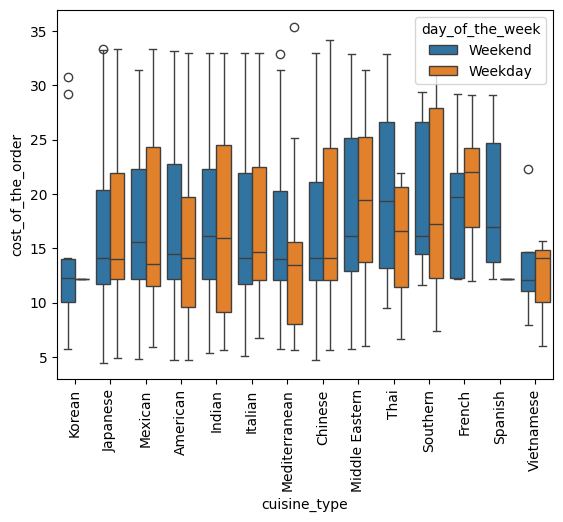

In [ ]:
plt.xticks(rotation=90)
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order', hue='day_of_the_week') ;

The price distributions of the different cuisine types is largely overlapping, but I do get very interested in the outliers. I have a hunch the Mediterranean outliers might be in a certain fancy or well-traveled part of town. The fact that Mediterranean food orders get pricier on weekends shows circumstantial support. Also on the topic of weekdays/weekend, it looks like we have maybe one data point for Spanish or Korean weekday. Let's check this.



In [ ]:
weekenddata=df[df['day_of_the_week']==('Weekend')] #only weekend data exa
weekdaydata=df[df['day_of_the_week']==('Weekday')] #only weekday data

weekdaydata['cuisine_type'].value_counts() # df['customer_id'].value_counts()


American          169
Japanese          135
Italian            91
Chinese            52
Mexican            24
Indian             24
Middle Eastern     17
Mediterranean      14
Southern            6
French              5
Thai                4
Vietnamese          3
Korean              2
Spanish             1
Name: cuisine_type, dtype: int64

In [ ]:
weekenddata['cuisine_type'].value_counts() # df['customer_id'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

Confirmed that Korean and Spanish statistics are too limited for weekday data.

Returning to the basic question of price comparisons,
Vietnamese food, for example, is mostly pretty cheap, maybe since the style is mostly takeout/delivery, but I'd be curious about that one outlier, which might be more of a fine dining/sit down place.  It's also interesting how uniform the pricing is within the Korean group, but at the same time having so many outliers.  To be safe, let's make sure out sample sizes aren't dramatically different.

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64

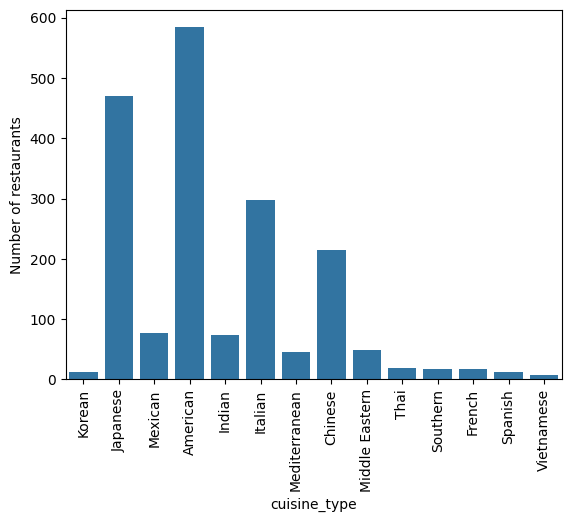

In [ ]:
plt.xticks(rotation=90)
plt.ylabel('Number of restaurants')
sns.countplot(data=df, x='cuisine_type');
df['cuisine_type'].value_counts()

Someting of the uniformity of the Korean subset might have to do with the small size of the Korean dataset. The overall cheaper Vietnamese set as well.  

Let's check if being slow-cooked truly is related to price



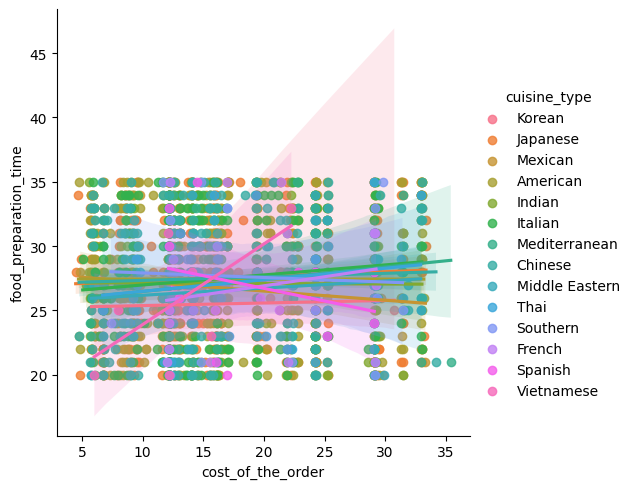

In [ ]:
sns.lmplot(data=df, x='cost_of_the_order', y='food_preparation_time', hue='cuisine_type');


Not seeing much here, though it is possible there is a relationship within one cuisine type

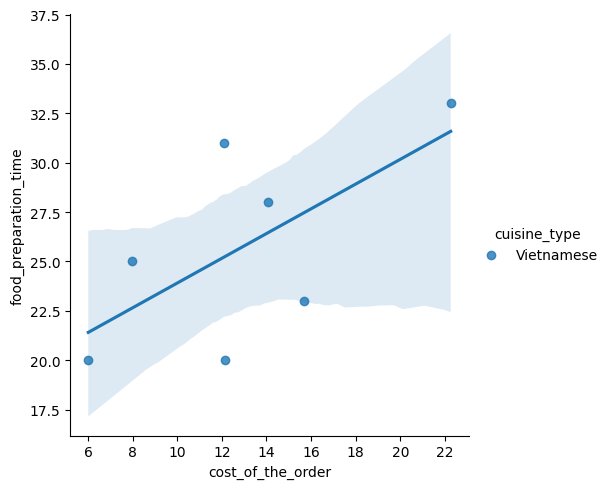

In [ ]:
viet_data=df[df['cuisine_type']==('Vietnamese')]#made a dataframe of just the Vietnamese data
sns.lmplot(data=viet_data, x='cost_of_the_order', y='food_preparation_time', hue='cuisine_type');

Not really enough data to make a claim about trends. Let's check all cuisine types for correalation to be certain.

In [ ]:
for each in df['cuisine_type'].unique(): #iterate over each cuisine type
  cuisine_subset=df[df['cuisine_type']==each]#define cuisine_subset for readability
  thecorr=np.corrcoef(cuisine_subset['food_preparation_time'],cuisine_subset['cost_of_the_order'])[0][1]#find cost and prep_time corr for each cuisine type
  print("results for ", each)
  print("corr between food prep time & cost is:", thecorr, "")#display results
  print("# samples", cuisine_subset.shape[0], "between ", cuisine_subset['restaurant_name'].nunique(), "restaurants")#display results
  print("------")#break for readability

results for  Korean
corr between food prep time & cost is: 0.03792987126785658 
# samples 13 between  5 restaurants
------
results for  Japanese
corr between food prep time & cost is: 0.058694680044506044 
# samples 470 between  29 restaurants
------
results for  Mexican
corr between food prep time & cost is: -0.11685911460502518 
# samples 77 between  11 restaurants
------
results for  American
corr between food prep time & cost is: -9.848604897824646e-05 
# samples 584 between  41 restaurants
------
results for  Indian
corr between food prep time & cost is: -0.006865527958683736 
# samples 73 between  14 restaurants
------
results for  Italian
corr between food prep time & cost is: 0.12532328774211407 
# samples 298 between  31 restaurants
------
results for  Mediterranean
corr between food prep time & cost is: 0.14752381457811198 
# samples 46 between  5 restaurants
------
results for  Chinese
corr between food prep time & cost is: 0.04404475329085068 
# samples 215 between  16 rest

Confirming that Vietnamese food is the only subset with a correlation between order cost and food prep time. Interpret this with caution, as sample size for Vietnamese is only 7 (our smallest data set).

**But enough of this talk of price, I'm hungry.  Get me food NOW!
 What should I order?**

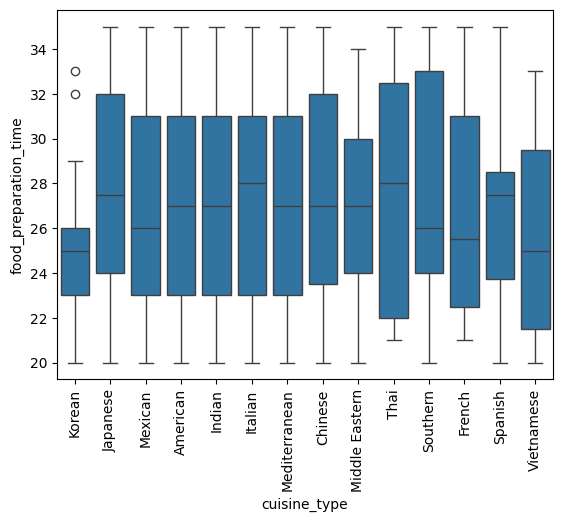

In [ ]:
plt.xticks(rotation=90)
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time') ;

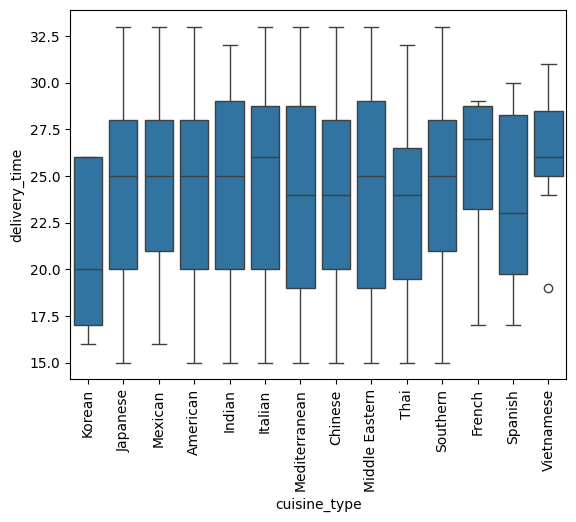

In [ ]:
plt.xticks(rotation=90)
sns.boxplot(data=df, x='cuisine_type', y='delivery_time') ;

Given that the delivery was outsourced to FoodHub drivers, cuisine type should not be correlated to delivery time.  Once again, Korean and Vietnamese samples look a bit strange, but this should be held in context to the limited sample size. Also, likely confounding factors of geographic distribution (i.e. the Korean and Vietnamese restaurants may be located in specific places (near or far) with regard to their primary clientele).

Finally, let's just do a comprehensive check of all the possible correlations we could see on the numerical variables.

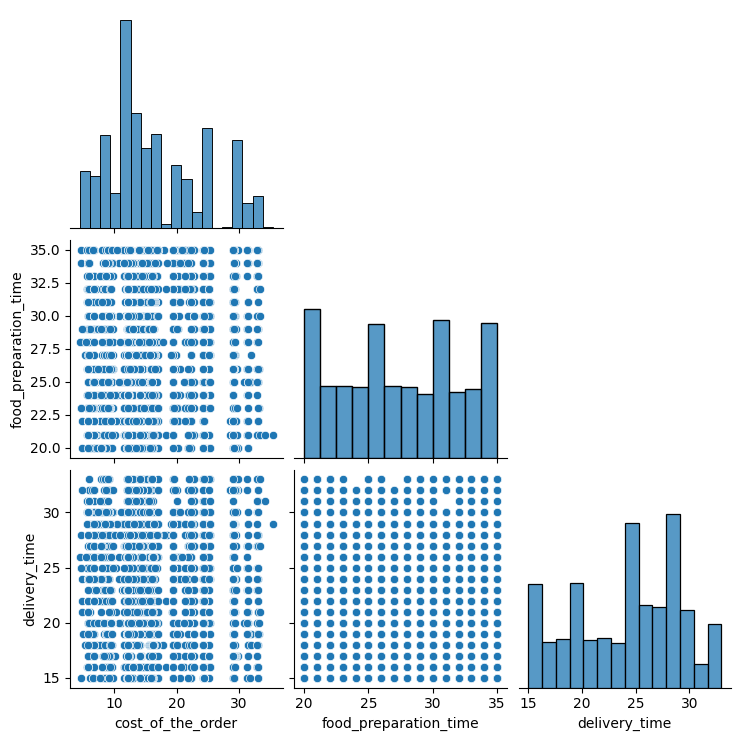

In [ ]:
sns.pairplot(data=df, vars=['cost_of_the_order','food_preparation_time','delivery_time'], corner=True);

No trending patterns are noted.

In [ ]:
np.corrcoef(df['food_preparation_time'],df['delivery_time'])[0][1]#confirming that prep and delivery times are uncorrelated

0.011094287962086615

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:

rated=df[df['rating'] != 'Not given']#removing unrated rows

for each in df['restaurant_name'].unique():#iterate over unique restaurant names
  rest_subset=rated[rated['restaurant_name']==each]#make a dataframe of only that restaurant
  if rest_subset['rating'].count()>50 and rest_subset['rating'].astype(int).mean()>4:
    print(each, "#ratings", rest_subset['rating'].count(), "; mean rating", rest_subset['rating'].astype(int).mean().round(2))



Blue Ribbon Fried Chicken #ratings 64 ; mean rating 4.33
The Meatball Shop #ratings 84 ; mean rating 4.51
Shake Shack #ratings 133 ; mean rating 4.28
Blue Ribbon Sushi #ratings 73 ; mean rating 4.22


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
over20=df[df['cost_of_the_order']>20]
under20=df[df['cost_of_the_order']<=20]
between5and20= under20[under20['cost_of_the_order']>5]
revenue = 0.25*over20['cost_of_the_order'].sum()+0.15*between5and20['cost_of_the_order'].sum()
print(revenue)

6166.303


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
df['total_time'] = df['food_preparation_time'] + df['delivery_time']#create a new column of total time
fast_enough=df['total_time']>60#create an array of booleans for whether time criteria is met
percent_fast=fast_enough.sum()/len(df)
print(percent_fast.round(3))


0.105


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
pd.pivot_table(df,'delivery_time', index=['day_of_the_week'])

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


Weekday delivery times are longer than weekend delivery times by approximately 6 minutes.

In [ ]:
pd.pivot_table(df,'delivery_time', index=['day_of_the_week'], columns='cuisine_type')

cuisine_type,American,Chinese,French,Indian,Italian,Japanese,Korean,Mediterranean,Mexican,Middle Eastern,Southern,Spanish,Thai,Vietnamese
day_of_the_week,,,,,,,,,,,,,,
Weekday,28.248521,28.826923,27.200000,27.625000,28.802198,28.133333,26.0,28.785714,28.250000,28.470588,29.500000,28.0,26.500000,27.666667
Weekend,22.542169,22.269939,24.615385,22.346939,22.705314,22.519403,20.0,21.312500,22.641509,21.750000,20.727273,23.0,22.266667,25.000000


#### Observations: The differences are consistent across cuisine type, as to be expected, since deliveries are outsourced to FoodHub drivers.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

In [ ]:
df_no_rating.shape[0]/df.shape[0]

0.38777660695468913

### Conclusions:
*  The price distributions of the different cuisine types is largely overlapping, as are the distributions of delivery and preparation times.  
* Food type does not strongly vary by day of the week.


### Recommendations:

*  Given that the ratings column is 39% empty, implement measures to make "ratings" either a required input from the customer or otherwise offer some kind of discount to customers who have rated all of their orders e.g. in the past week
* Collect more specific data on days of the week e.g. for the ability to separate Fridays.
* Give customers a "faster food now" filter with a slider to screen only for restaurants whose preparation time is less than the time specified by the slider.

In [ ]:
%%shell
jupyter nbconvert --to html /content/FDS_Project_LearnerNotebook_FullCode.ipynb


[NbConvertApp] Converting notebook /content/FDS_Project_LearnerNotebook_FullCode.ipynb to html
[NbConvertApp] Writing 1517413 bytes to /content/FDS_Project_LearnerNotebook_FullCode.html


---